In [28]:
# Loading Library Python
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.naive_bayes import GaussianNB, CategoricalNB, MultinomialNB, ComplementNB
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import joblib


In [29]:
# Load dataset dari CSV
df_net = pd.read_csv('dataset_buys_comp.csv')
df_net.head()

,Age,Income,Student,Credit_Rating,Buys_Computer
0,Tua,Tinggi,Ya,Buruk,0
1,Paruh Baya,Tinggi,Ya,Baik,1
2,Paruh Baya,Rendah,Tidak,Buruk,1
3,Tua,Rendah,Tidak,Baik,1
4,Tua,Rendah,Ya,Baik,1


In [30]:
# Tampilkan informasi awal
print("Informasi Dataset:")
print(f"Jumlah Baris: {df_net.shape[0]}")
print(f"Jumlah Kolom: {df_net.shape[1]}")
print(df_net.head())

print("\nInformasi Tipe Data:")
print(df_net.info())

print("\nStatistik Deskriptif:")
print(df_net.describe(include='all'))

print("\nDistribusi Target 'Buys_Computer':")
print(df_net['Buys_Computer'].value_counts())
print(f"Persentase Positif: {100 * df_net['Buys_Computer'].mean():.2f}%")

Informasi Dataset:
Jumlah Baris: 1000
Jumlah Kolom: 5
          Age  Income Student Credit_Rating  Buys_Computer
0         Tua  Tinggi      Ya         Buruk              0
1  Paruh Baya  Tinggi      Ya          Baik              1
2  Paruh Baya  Rendah   Tidak         Buruk              1
3         Tua  Rendah   Tidak          Baik              1
4         Tua  Rendah      Ya          Baik              1

Informasi Tipe Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Age            1000 non-null   object
 1   Income         1000 non-null   object
 2   Student        1000 non-null   object
 3   Credit_Rating  1000 non-null   object
 4   Buys_Computer  1000 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 39.2+ KB
None

Statistik Deskriptif:
               Age  Income Student Credit_Rating  Buys_Computer
count         1000   

In [31]:
# Identifikasi kolom kategorikal dan numerik
categorical_cols = df_net.select_dtypes(include=['object']).columns.tolist()
numerical_cols = df_net.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("\nKolom Kategorikal:", categorical_cols)
print("Kolom Numerik:", numerical_cols)

if 'Buys_Computer' in numerical_cols:
    numerical_cols.remove('Buys_Computer')


Kolom Kategorikal: ['Age', 'Income', 'Student', 'Credit_Rating']
Kolom Numerik: ['Buys_Computer']


In [32]:
# Cek missing values
print("Missing Values:")
print(df_net.isnull().sum())

Missing Values:
Age              0
Income           0
Student          0
Credit_Rating    0
Buys_Computer    0
dtype: int64


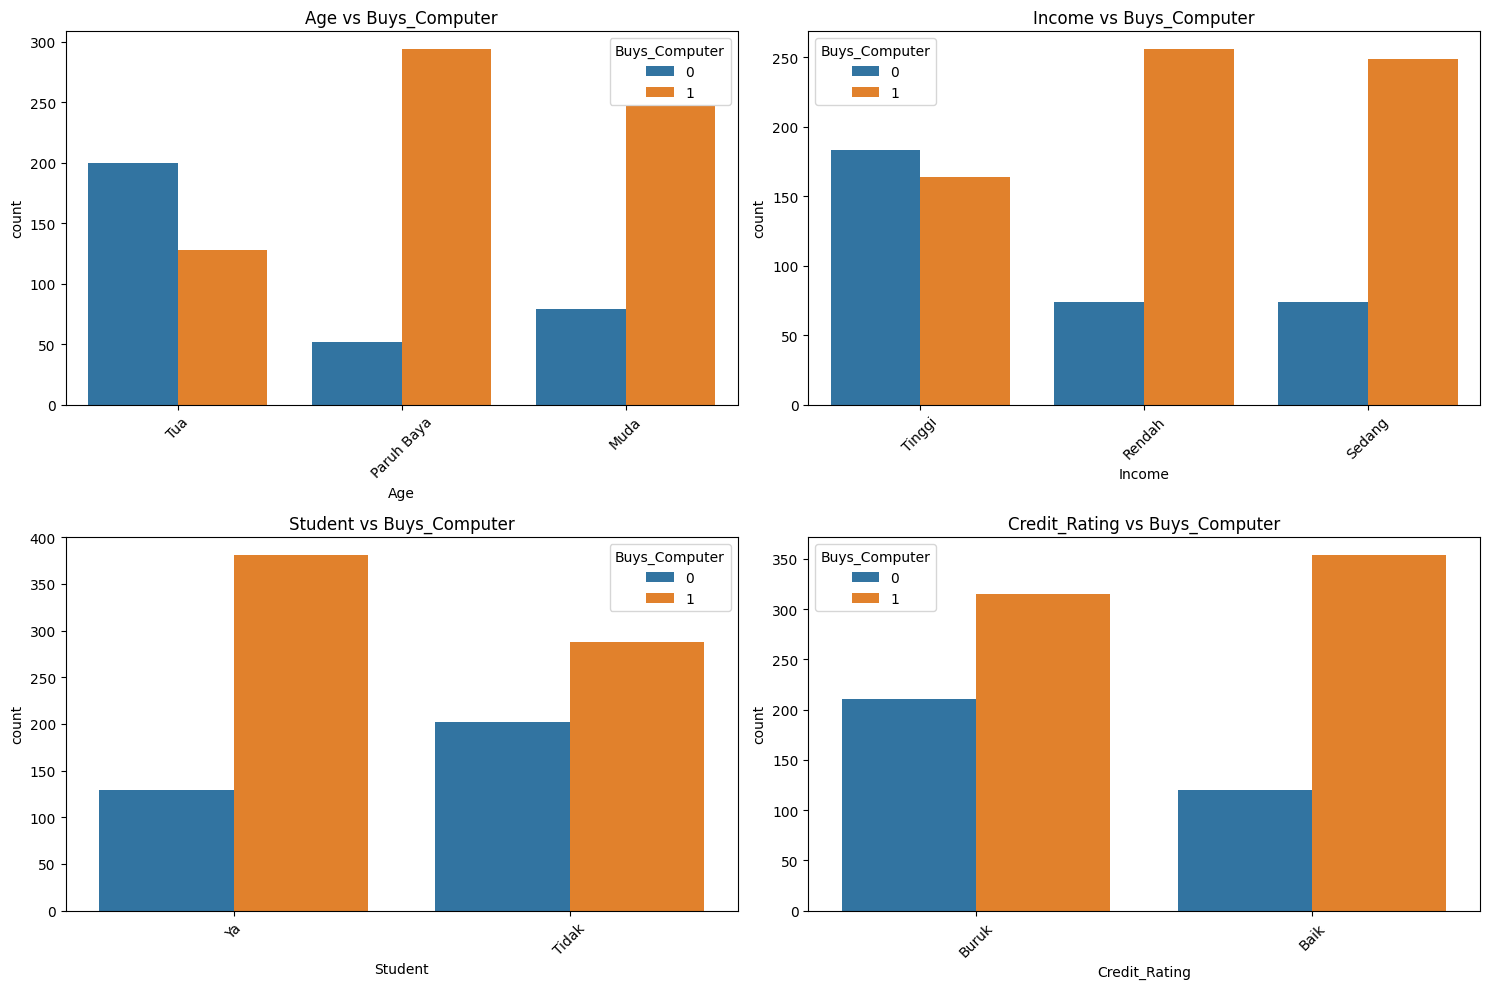

In [33]:
# Visualisasi distribusi fitur kategorikal terhadap target
plt.figure(figsize=(15, 10))
for i, feature in enumerate(categorical_cols):
    if feature != 'Buys_Computer':
        plt.subplot(2, 2, i+1)
        sns.countplot(data=df_net, x=feature, hue='Buys_Computer')
        plt.title(f'{feature} vs Buys_Computer')
        plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [34]:
# Persiapan data untuk modeling
X = df_net.drop('Buys_Computer', axis=1)
y = df_net['Buys_Computer']

In [35]:
# Split data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f"\nJumlah data training: {X_train.shape[0]}")
print(f"Jumlah data testing: {X_test.shape[0]}")


Jumlah data training: 700
Jumlah data testing: 300


In [36]:
# Preprocessing menggunakan OneHotEncoder untuk Data Kategorikal
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [37]:
# Preprocessing tanpa scalling untuk data numerik
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_cols)
    ],
    remainder='passthrough'
)

In [38]:
# Membuat pipeline dengan menggunakan GaussianNB
nb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GaussianNB())
])

In [39]:
# Melatih model
nb_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Age', 'Income', 'Student',
                                                   'Credit_Rating'])])),
                ('classifier', GaussianNB())])

In [40]:
# Evaluasi model
y_pred = nb_pipeline.predict(X_test)
y_pred_prob = nb_pipeline.predict_proba(X_test)[:, 1]

print("===== EVALUASI MODEL NAIVE BAYES =====")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

===== EVALUASI MODEL NAIVE BAYES =====
Accuracy: 0.7633
Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.64      0.64        99
           1       0.82      0.83      0.82       201

    accuracy                           0.76       300
   macro avg       0.73      0.73      0.73       300
weighted avg       0.76      0.76      0.76       300

Confusion Matrix:
[[ 63  36]
 [ 35 166]]


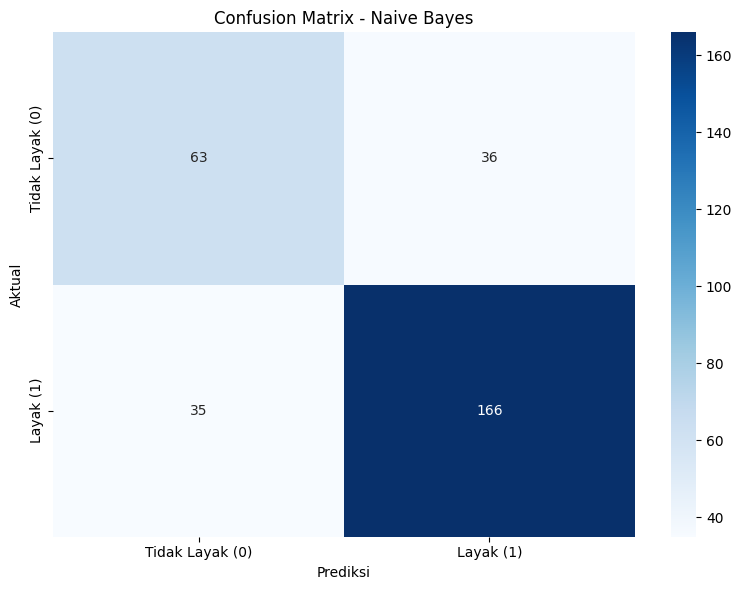

In [41]:
# Visualisasi Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Tidak Layak (0)', 'Layak (1)'],
            yticklabels=['Tidak Layak (0)', 'Layak (1)'])
plt.title('Confusion Matrix - Naive Bayes')
plt.ylabel('Aktual')
plt.xlabel('Prediksi')
plt.tight_layout()
plt.show()

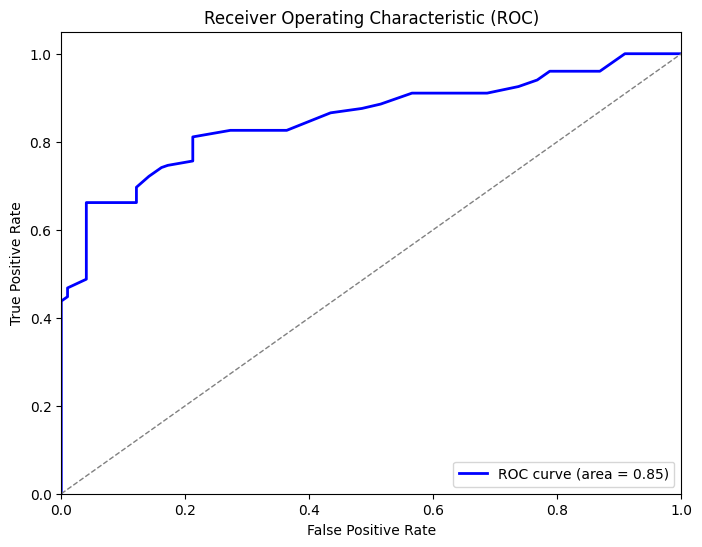

In [42]:
# Evaluasi dengan ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [43]:
# Cross-validation
cv_scores = cross_val_score(nb_pipeline, X, y, cv=5, scoring='accuracy')
print(f"Cross-validation accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

parameters = [
    {
        'classifier': [GaussianNB()],
        'classifier__var_smoothing': [1e-9, 1e-8, 1e-7]
    },
    {
        'classifier': [MultinomialNB(), ComplementNB()], 
        'classifier__alpha': [0.1, 0.5, 1.0]
    }
]

grid_search = GridSearchCV(nb_pipeline, parameters, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X, y)

print("===== HASIL GRID SEARCH =====")
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.4f}")

Cross-validation accuracy: 0.7710 (+/- 0.0711)
===== HASIL GRID SEARCH =====
Best parameters: {'classifier': GaussianNB(), 'classifier__var_smoothing': 1e-09}
Best cross-validation score: 0.7710


In [44]:
# Model terbaik dari Grid Search
best_model = grid_search.best_estimator_

In [45]:
# Mengevaluasi model terbaik dengan cross-validation
best_cv_scores = cross_val_score(best_model, X, y, cv=5, scoring='accuracy')
print(f"\nBest model cross-validation accuracy: {best_cv_scores.mean():.4f} (+/- {best_cv_scores.std() * 2:.4f})")


Best model cross-validation accuracy: 0.7710 (+/- 0.0711)


In [46]:
# Prediksi sampel baru dengan model terbaik
print("===== SIMULASI PREDIKSI UNTUK SAMPEL BARU =====")
new_samples = pd.DataFrame({
    'Age': ['Muda', 'Tua', 'Paruh Baya'],
    'Income': ['Tinggi', 'Rendah', 'Tinggi'],
    'Student': ['Ya', 'Tidak', 'Tidak'],
    'Credit_Rating': ['Baik', 'Buruk', 'Baik']
})
print("Sampel baru untuk prediksi:")
print(new_samples)

===== SIMULASI PREDIKSI UNTUK SAMPEL BARU =====
Sampel baru untuk prediksi:
          Age  Income Student Credit_Rating
0        Muda  Tinggi      Ya          Baik
1         Tua  Rendah   Tidak         Buruk
2  Paruh Baya  Tinggi   Tidak          Baik


In [47]:
# Prediksi
new_pred = best_model.predict(new_samples)
new_pred_prob = best_model.predict_proba(new_samples)

In [48]:
# Hasil prediksi
print("\nHasil prediksi:")
for i, row in new_samples.iterrows():
    pred_class = "Layak" if new_pred[i] == 1 else "Tidak Layak"
    print(f"Sampel {i+1} ({dict(row)}):")
    print(f"Prediksi: {pred_class}")
    print(f"Probabilitas [Tidak Layak, Layak]: {new_pred_prob[i]}")
    print()


Hasil prediksi:
Sampel 1 ({'Age': 'Muda', 'Income': 'Tinggi', 'Student': 'Ya', 'Credit_Rating': 'Baik'}):
Prediksi: Layak
Probabilitas [Tidak Layak, Layak]: [0.17723022 0.82276978]

Sampel 2 ({'Age': 'Tua', 'Income': 'Rendah', 'Student': 'Tidak', 'Credit_Rating': 'Buruk'}):
Prediksi: Tidak Layak
Probabilitas [Tidak Layak, Layak]: [0.88112786 0.11887214]

Sampel 3 ({'Age': 'Paruh Baya', 'Income': 'Tinggi', 'Student': 'Tidak', 'Credit_Rating': 'Baik'}):
Prediksi: Layak
Probabilitas [Tidak Layak, Layak]: [0.18122179 0.81877821]



In [49]:
# Feature Importance (untuk model terbaik)
print("===== ANALISIS FITUR PENTING =====")
try:
    preprocessor = best_model.named_steps['preprocessor']
    feature_names = preprocessor.get_feature_names_out()
    
    nb_model = best_model.named_steps['classifier']
    
    if isinstance(nb_model, GaussianNB):
        print("Feature importance berdasarkan perbedaan mean antara kelas positif dan negatif:")
        mean_diff = abs(nb_model.theta_[1] - nb_model.theta_[0])
        for i, (name, importance) in enumerate(zip(feature_names, mean_diff)):
            print(f"{name}: {importance:.4f}")
    else:
        print("Feature importance tidak tersedia untuk tipe model Naive Bayes yang digunakan.")
except:
    print("Tidak dapat menampilkan feature importance.")

joblib.dump(best_model, 'naive_bayes_credit_model.pkl')
print("Model terbaik telah disimpan ke 'naive_bayes_credit_model.pkl'")

===== ANALISIS FITUR PENTING =====
Feature importance berdasarkan perbedaan mean antara kelas positif dan negatif:
cat__Age_Muda: 0.1305
cat__Age_Paruh Baya: 0.2824
cat__Age_Tua: 0.4129
cat__Income_Rendah: 0.1591
cat__Income_Sedang: 0.1486
cat__Income_Tinggi: 0.3077
cat__Student_Tidak: 0.1798
cat__Student_Ya: 0.1798
cat__Credit_Rating_Baik: 0.1666
cat__Credit_Rating_Buruk: 0.1666
Model terbaik telah disimpan ke 'naive_bayes_credit_model.pkl'
